In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

df = pd.read_csv('long-quotes.csv')
#petite exploration des données
print(df.head())
print(list(df.columns))

   Unnamed: 0        long_quote_id              lead_id last_utm_source  \
0           0  7527452923606463240 -1065398551916348537             NaN   
1           1  2676593580459190130 -3188174584045372774             NaN   
2           2 -8181351603970286153   809161028469555575             NaN   
3           3  -764732241225017791 -3998524949057029294             NaN   
4           4 -6788988993999017586  6417788977143244366             NaN   

   has_been_proposed_formulas  has_chosen_formula  has_subscribed_online  \
0                       False               False                  False   
1                       False               False                  False   
2                       False               False                  False   
3                       False               False                  False   
4                       False               False                  False   

              submitted_at effective_start_date rbs_result  ...  \
0  2021-09-01 18:18:19 UT

# Exploration des données

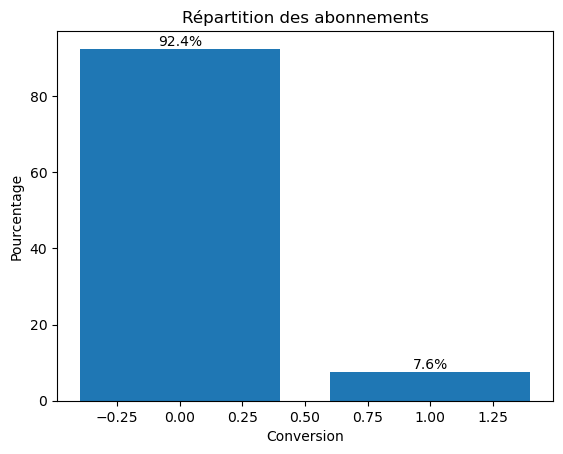

In [100]:
#histogramme %tage de conversion
subscription_counts = df['has_subscribed'].value_counts()
percentages = (subscription_counts / subscription_counts.sum()) * 100
plt.bar(percentages.index, percentages.values)
plt.xlabel("Conversion")
plt.ylabel("Pourcentage")
plt.title("Répartition des abonnements")

#j'affiche les pourcentages
for i, percentage in enumerate(percentages.values):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

Le dataset est très déséquilibré, nous verrons plus tard si on peut/s'il faut y remédier

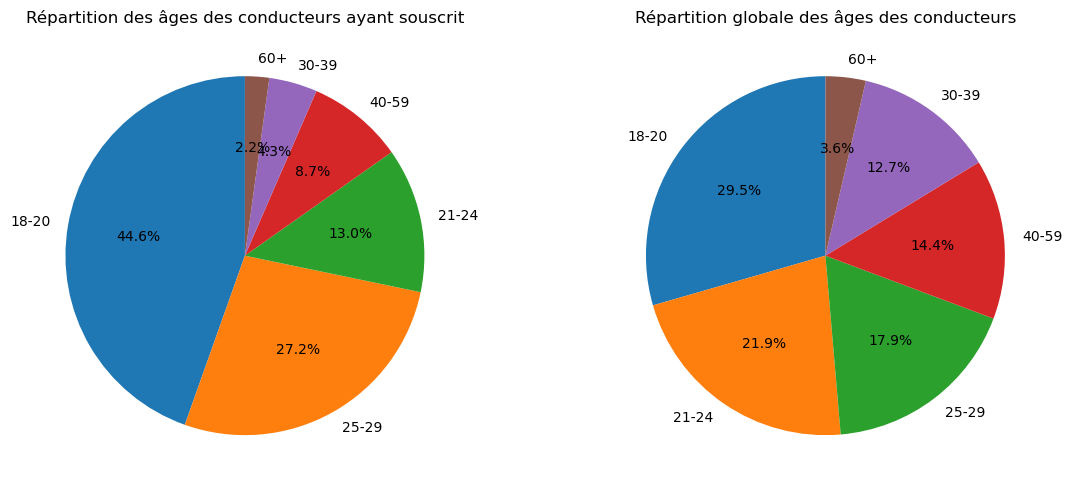

In [101]:
#Je fais le count des colonnes que je veux visualiser au global
age_full = df['main_driver_age'].value_counts()
gender_full = df['main_driver_gender'].value_counts()
license_full = df['main_driver_licence_age'].value_counts()
vehicle_region_full = df['vehicle_region'].value_counts()
vehicle_age_full = df['vehicle_age'].value_counts()

#je prends uniquement les peronnes ayants souscrits
suscribe_df = df[df['has_subscribed'] == True]

age_counts = suscribe_df['main_driver_age'].value_counts()
gender_counts = suscribe_df['main_driver_gender'].value_counts()
license_counts = suscribe_df['main_driver_licence_age'].value_counts()
vehicle_region_counts = suscribe_df['vehicle_region'].value_counts()
vehicle_age_counts = suscribe_df['vehicle_age'].value_counts()

#camembert chart age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))#dimension

ax1.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90) #type du graphique
ax1.set_title("Répartition des âges des conducteurs ayant souscrit") #titre du graphique
ax2.pie(age_full, labels=age_full.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Répartition globale des âges des conducteurs")
  
plt.tight_layout()

La répartition des âges est différente quand on comapre le global et les personnes ayants souscrits un contrat d'assurance. Cette variable semble être importante pour la prédiction

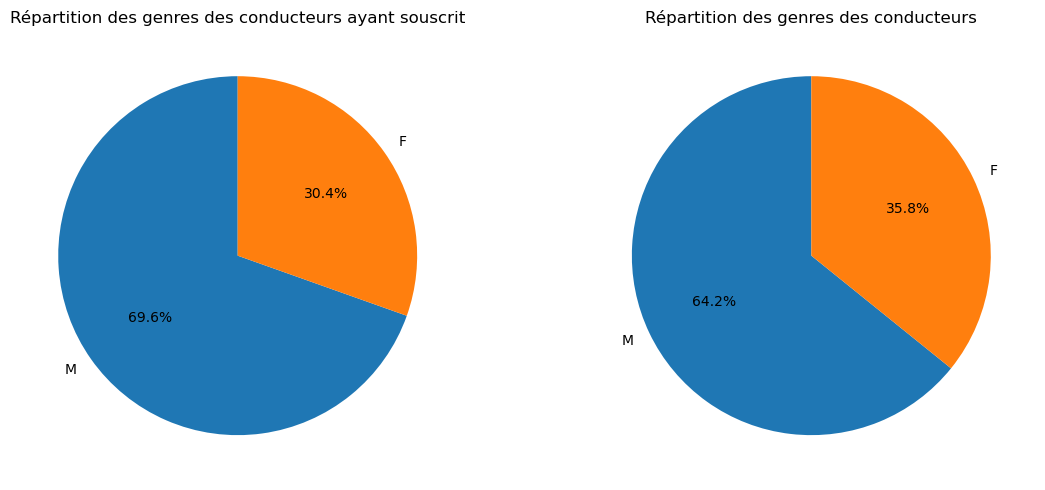

In [102]:
#pie chart gender

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

ax3.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("Répartition des genres des conducteurs ayant souscrit")
ax4.pie(gender_full, labels=gender_full.index, autopct='%1.1f%%', startangle=90)
ax4.set_title("Répartition des genres des conducteurs")
plt.tight_layout()

La répartition des genres est presque similaire d'un cas à l'autre, cette variable ne semble pas importante.

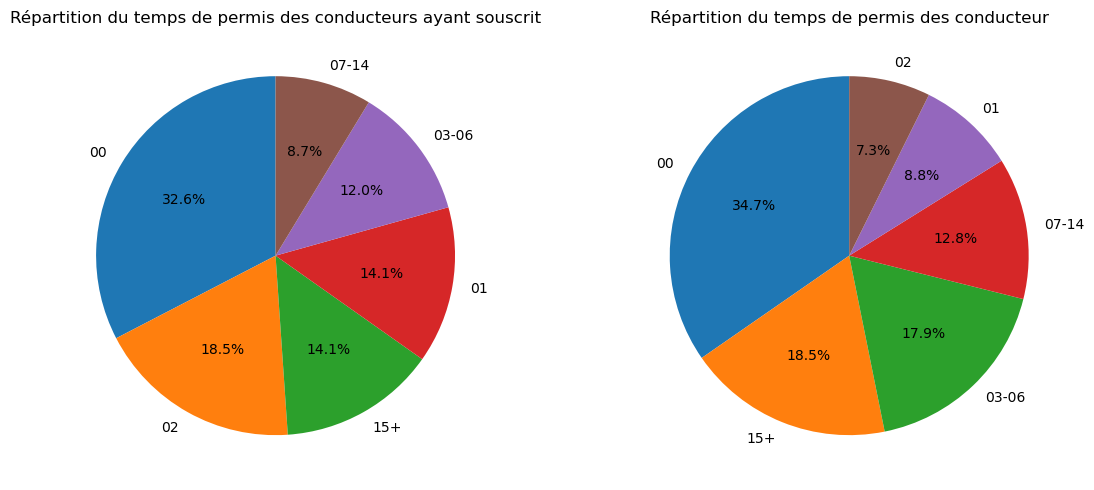

In [103]:
#camembert license age

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 5))

ax5.pie(license_counts, labels=license_counts.index, autopct='%1.1f%%', startangle=90)
ax5.set_title("Répartition du temps de permis des conducteurs ayant souscrit")
ax6.pie(license_full, labels=license_full.index, autopct='%1.1f%%', startangle=90)
ax6.set_title("Répartition du temps de permis des conducteur")
plt.tight_layout()

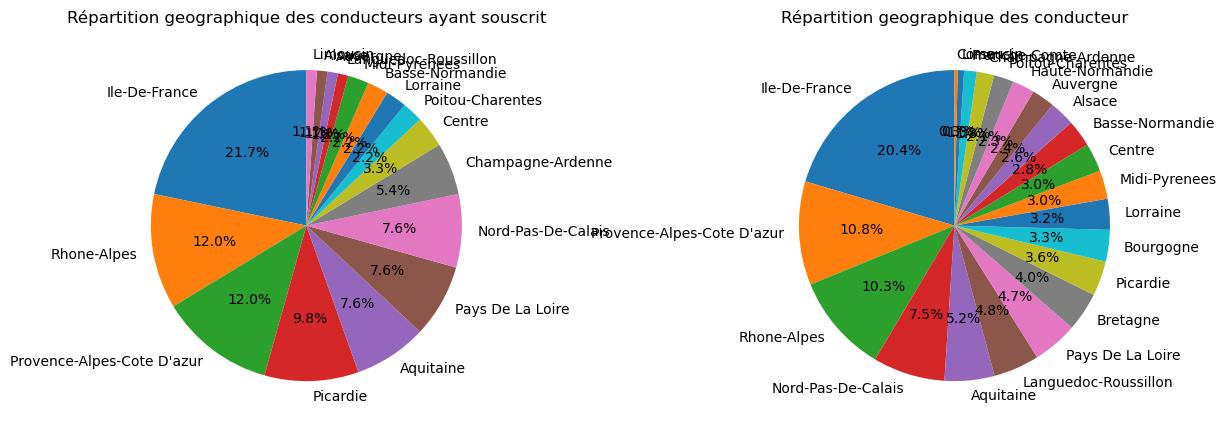

In [104]:
#camembert region

fig, (ax7, ax8) = plt.subplots(1, 2, figsize=(12, 5))

ax7.pie(vehicle_region_counts, labels=vehicle_region_counts.index, autopct='%1.1f%%', startangle=90)
ax7.set_title("Répartition geographique des conducteurs ayant souscrit")
ax8.pie(vehicle_region_full, labels=vehicle_region_full.index, autopct='%1.1f%%', startangle=90)
ax8.set_title("Répartition geographique des conducteur")
plt.tight_layout()

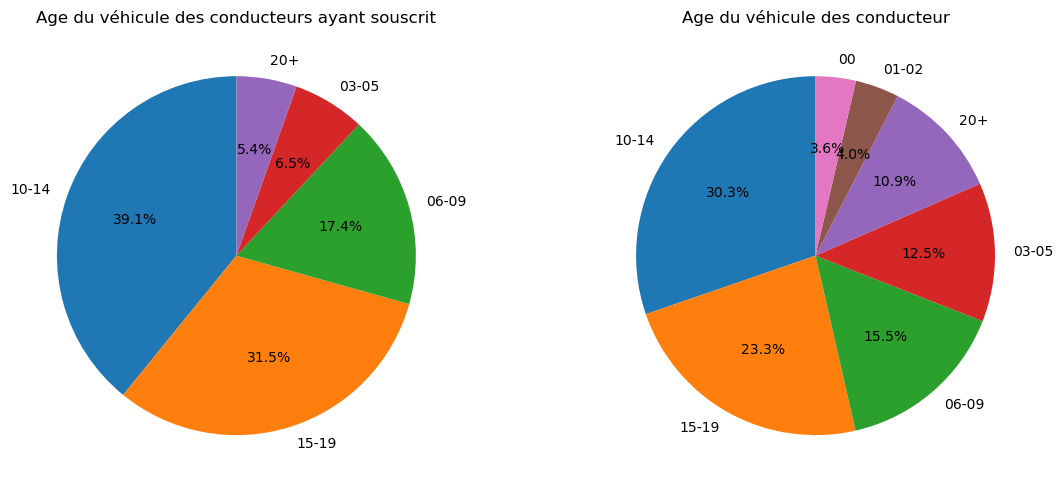

In [105]:
#camembert age du vehicule

fig, (ax9, ax10) = plt.subplots(1, 2, figsize=(12, 5))

ax9.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', startangle=90)
ax9.set_title("Age du véhicule des conducteurs ayant souscrit")
ax10.pie(vehicle_age_full, labels=vehicle_age_full.index, autopct='%1.1f%%', startangle=90)
ax10.set_title("Age du véhicule des conducteur")
plt.tight_layout()

De la même manière :
- L'âge du véhicule semble ne pas avoir d'impact.
- Les régions géographiques non plus.
- Le temps après obtention du permis au contraire semble avoir un peu d'impact.

# Nettoyage des données

Maintenant que nous avons une vision globale des données, passons à l'étape du nettoyage des données :

Text(0.5, 1.0, 'Répartition des mois complétion du devis')

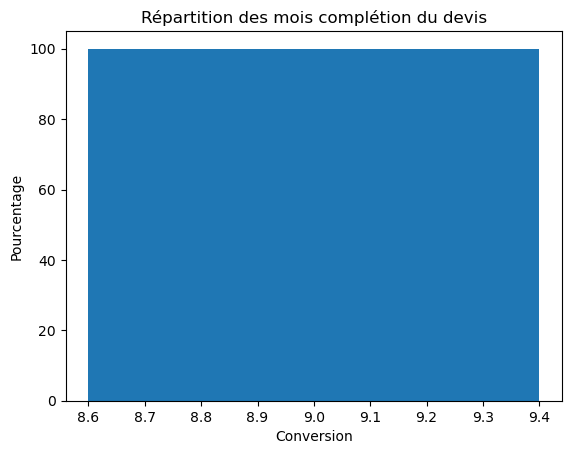

In [106]:
df['submitted_at'] = pd.to_datetime(df['submitted_at'])
df['submitted_at'] = df['submitted_at'].dt.month
month_counts = df['submitted_at'].value_counts()
percentages = (month_counts / month_counts.sum()) * 100
plt.bar(percentages.index, percentages.values)
plt.xlabel("Conversion")
plt.ylabel("Pourcentage")
plt.title("Répartition des mois complétion du devis")

Tous les devis ont été complétés en septembre, je suppose donc que cette colonne est inutile.
Je decide de supprimer la colonne 'has_subscribed_online' car la colonne 'has_subscribed' contient déjà l'information qui m'interesse.
"has_subscribed_online" peut être utile pour une autre étude -> prédire la conversion en ligne, mais je ne veux pas complexifier le problème ici.
Les id ne sont pas utiles pour notre étude.

In [107]:
#supression des colonnes partie 1
df.drop(columns=['Unnamed: 0','long_quote_id', 'lead_id','last_utm_source','submitted_at',
                'contract_id','effective_start_date','policy_subscribed_at','payment_frequency','has_subscribed_online','vehicle_region'], axis = 1, inplace = True)


Je convertis maintenant les valeurs textuelles en numériques pour le bon fonctionnement des modèles de prédiction.

In [108]:
#je remplace les vrai faux par 1 et 0
df['has_subscribed'].replace({True : 1, False : 0}, inplace = True)
df['has_secondary_driver'].replace({True : 1, False : 0}, inplace = True)
df['has_chosen_formula'].replace({True : 1, False : 0}, inplace = True)
df['has_been_proposed_formulas'].replace({True : 1, False : 0}, inplace = True)

In [109]:
#je regarde de quoi sont composées les colonnes restantes pour pouvoir convertir les valeurs textuelles en numeriques

tranches_age_unique = df['main_driver_age'].unique()
print(tranches_age_unique)
tranches_license_age_unique = df['main_driver_licence_age'].unique()
print(tranches_license_age_unique)
driver_bonus_unique = df['main_driver_bonus'].unique()
print(driver_bonus_unique)
vehicule_age_unique = df['vehicle_age'].unique()
print(vehicule_age_unique)
vehicule_class_unique = df['vehicle_class'].unique()
print(vehicule_class_unique)
vehicule_group_unique = df['vehicle_group'].unique()
print(vehicule_group_unique)
rbs_result_unique = df['rbs_result'].unique()
print(rbs_result_unique)
provider_unique = df['provider'].unique()
print(provider_unique)
product_third_party_unique = df['product_third_party'].unique()
print(product_third_party_unique)
annual_price_third_party_unique = df['annual_price_third_party'].unique()
print(annual_price_third_party_unique)

['40-59' '21-24' '18-20' '25-29' '30-39' '60+']
['15+' '03-06' '00' '02' '01' '07-14']
['064-084' '050' '100' '085-099' '101+' '051-063']
['03-05' '10-14' '00' '06-09' '20+' '15-19' '01-02']
['I-K' 'O-R' 'L-N' 'F-H' 'S-T' nan 'A-E' 'U+']
['31-32' '29-30' '35+' '33-34' '27-28' nan '20-26']
[nan 'rejected' 'needs device' 'accepted']
[nan 'provider_A' 'provider_B']
[nan 'third_party_product_1' 'third_party_product_2'
 'third_party_product_3' 'third_party_product_4' 'third_party_product_5'
 'third_party_product_6' 'third_party_product_7' 'third_party_product_8'
 'third_party_product_9' 'third_party_product_10' 'third_party_product_11'
 'third_party_product_12' 'third_party_product_13'
 'third_party_product_14' 'third_party_product_15'
 'third_party_product_16' 'third_party_product_17'
 'third_party_product_18' 'third_party_product_19'
 'third_party_product_20' 'third_party_product_21'
 'third_party_product_22' 'third_party_product_23'
 'third_party_product_24' 'third_party_product_25'
 'th

In [110]:
#je regarde les colonnes contenant des NaN
for column in df.columns:
    # On vérifie si la colonne contient des valeurs NaN
    if df[column].isna().any():
        print(f"La colonne '{column}' contient des valeurs NaN")
        
df['rbs_result'].fillna('none', inplace = True) #resultat du test psychologique
df['provider'].fillna('Provider Null', inplace = True) #fournisseur contrat
df['product_third_party'].fillna('none', inplace = True) #produit tiers proposé
df['product_intermediate'].fillna('none', inplace = True) #produit intermediaire proposé
df['product_all_risks'].fillna('none', inplace = True) #produit tous risques proposé
df['annual_price_third_party'].fillna('none', inplace = True) #niveau de prix produit tiers 
df['annual_price_intermediate'].fillna('none', inplace = True) #niveau de prix produit intermediaire 
df['annual_price_all_risks'].fillna('none', inplace = True) #niveau de prix produit tous risques 
df['chosen_formula'].fillna('none', inplace = True) #formule cliquée
df['chosen_product'].fillna('none', inplace = True) #produit cliqué

La colonne 'rbs_result' contient des valeurs NaN
La colonne 'provider' contient des valeurs NaN
La colonne 'product_third_party' contient des valeurs NaN
La colonne 'product_intermediate' contient des valeurs NaN
La colonne 'product_all_risks' contient des valeurs NaN
La colonne 'annual_price_third_party' contient des valeurs NaN
La colonne 'annual_price_intermediate' contient des valeurs NaN
La colonne 'annual_price_all_risks' contient des valeurs NaN
La colonne 'chosen_formula' contient des valeurs NaN
La colonne 'chosen_product' contient des valeurs NaN
La colonne 'vehicle_class' contient des valeurs NaN
La colonne 'vehicle_group' contient des valeurs NaN


In [111]:
#je convertis le textuel en numérique
df['main_driver_age'].replace({'18-20' : 1, '21-24' : 2, '25-29' : 3, '30-39' : 4, '40-59' : 5, '60+': 6}, inplace = True)
df['main_driver_licence_age'].replace({'00' : 1, '01' : 2, '02' : 3, '03-06' : 4, '07-14' : 5, '15+': 6}, inplace = True)
df['main_driver_bonus'].replace({'050' : 1, '051-063' : 2, '064-084' : 3, '085-099' : 4, '100' : 5, '101+': 6}, inplace = True)
df['vehicle_age'].replace({'00' : 1, '01-02' : 2, '03-05' : 3, '06-09' : 4, '10-14' : 5, '15-19':6, '20+': 6}, inplace = True)
df['vehicle_class'].replace({'A-E' : 1, 'F-H' : 2, 'I-K' : 3, 'L-N' : 4, 'O-R' : 5, 'S-T': 6, 'U+': 7}, inplace = True)
df['vehicle_group'].replace({'20-26' : 1, '27-28' : 2, '29-30' : 3, '31-32' : 4, '33-34' : 5, '35+': 6}, inplace = True)
df['rbs_result'].replace({'none' : 0, 'rejected' : 1, 'needs device' : 2, 'accepted' : 3}, inplace = True)
df['annual_price_third_party'].replace({'none' : 0, 'low' : 1, 'medium' : 2, 'high' : 3}, inplace = True)
df['annual_price_intermediate'].replace({'none' : 0, 'low' : 1, 'medium' : 2, 'high' : 3}, inplace = True)
df['annual_price_all_risks'].replace({'none' : 0, 'low' : 1, 'medium' : 2, 'high' : 3}, inplace = True)

df['vehicle_class'].fillna(int(df['vehicle_class'].mean()), inplace=True)#classe du véhicule
df['vehicle_group'].fillna(int(df['vehicle_group'].mean()), inplace=True)#groupe du véhicule


Je ne sais pas à quoi correspondent les différents niveau de produit tiers/intermediaire/tous risques correspondent, je fais le choix de convertir ces colonnes en binaire

In [112]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0,len(df)):
    if df['product_third_party'][i] == 'none' : 
        df['product_third_party'][i] = 0
    else:
        df['product_third_party'][i] = 1

for i in range(0,len(df)):
    if df['product_intermediate'][i] == 'none' : 
        df['product_intermediate'][i] = 0
    else:
        df['product_intermediate'][i] = 1
        
for i in range(0,len(df)):
    if df['product_all_risks'][i] == 'none' : 
        df['product_all_risks'][i] = 0
    else:
        df['product_all_risks'][i] = 1
        
for i in range(0,len(df)):
    if df['chosen_formula'][i] == 'none' : 
        df['chosen_formula'][i] = 0
    else:
        df['chosen_formula'][i] = 1
        
for i in range(0,len(df)):
    if df['chosen_product'][i] == 'none' : 
        df['chosen_product'][i] = 0
    else:
        df['chosen_product'][i] = 1
        
df['product_third_party'] = df['product_third_party'].astype(int)
df['product_intermediate'] = df['product_intermediate'].astype(int)
df['product_all_risks'] = df['product_all_risks'].astype(int)
df['chosen_formula'] = df['chosen_formula'].astype(int)
df['chosen_product'] = df['chosen_product'].astype(int)

In [113]:
#one hot encoding pour les colonnes provide, genre, et region

one_hot_provider = pd.get_dummies(df['provider'])
one_hot_gender = pd.get_dummies(df['main_driver_gender'])

df.drop(columns=['provider','main_driver_gender'], axis = 1, inplace = True)#je supprime les colonnes dont on vient de créer des dummies

#je fusionne les dummies au dataframe
df = df.join(one_hot_provider)
df = df.join(one_hot_gender)

Mon raisonnement pour la conversion des variables est le suivant : 
- Pour les colonnes binaires (Vrai/faux) -> je remplace par 0 ou 1
- Pour les colonnes avec des niveaux (par exemple : low, medium, high ou encore des tranches d'âges) -> je remplace par des chiffres croissants (1,2,3)
- Je remplace aussi les variables NaN par les moyennes


<Axes: >

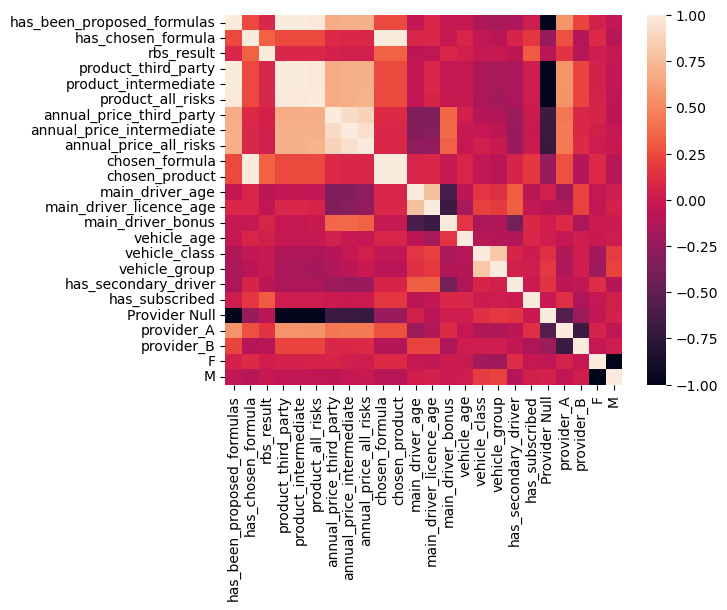

In [58]:
#creation d'une matrice de correlation
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

Les produits proposés et 'has been proposed formula' sont fortement corrélés entre eux poisitivement -> plus l'un est élevé plus les autres le sont et inversement, je peux donc ne garder qu'une colonne entre les 4.
Idem pour les prix des produits proposés.
Idem pour les colonnes 'main_driver_license_age' et 'main_driver_age', je n'en garde donc qu'une.
Idem pour 'vehicle_group' et 'vehicle_class'.
Idem pour 'chosen formula' et 'has chosen formula' et 'chosen_product'.
A l'inverse le genre M et le genre F sont parfaitement corrélés négativement entre eux, ce qui est logique.


In [114]:
#Suppression des colonnes n°2

df.drop(columns=['product_third_party','product_intermediate','product_all_risks','annual_price_third_party','annual_price_intermediate',
                 'main_driver_licence_age','vehicle_group','chosen_formula','chosen_product', 'Provider Null','F','M','has_chosen_formula','annual_price_all_risks','vehicle_age'], axis = 1, inplace = True)


Comme nous l'avons vu dans la partie exploration des données, le genre, l'âge du véhicule ne semblent pas avoir d'impact. Je les supprime du modèle.

# Création du modèle

In [115]:
X = df.drop(['has_subscribed'], axis=1)
y = df['has_subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42) #split classique 70/30
             

1er modèle : Random Forest Classifier

In [116]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)
rfc_predict_proba = rfc.predict_proba(X_test)
print("RFC matrice de confusion")
print(confusion_matrix(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))
print('\n')

RFC matrice de confusion
[[340   2]
 [ 15   8]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       342
           1       0.80      0.35      0.48        23

    accuracy                           0.95       365
   macro avg       0.88      0.67      0.73       365
weighted avg       0.95      0.95      0.94       365





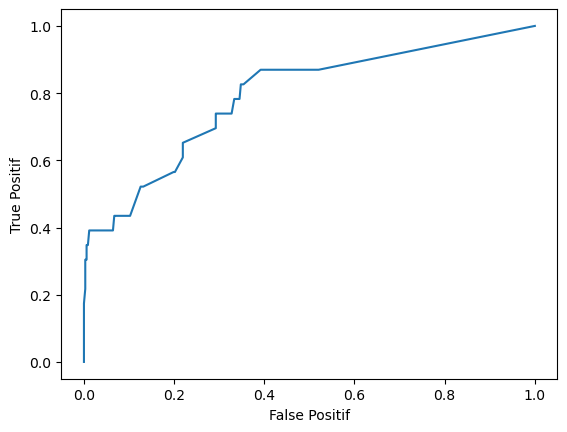

In [117]:
rfc_predict_treshold = rfc_predict_proba[:,1]

from sklearn import metrics
fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_test,  rfc_predict_treshold)
plt.plot(fpr_rfc,tpr_rfc)
plt.ylabel('True Positif')
plt.xlabel('False Positif')
plt.show()


De base, les modèles vont avoir un treshold de 0,5. Quand la probabilité sera > 0,5 le leads sera considéré comme un succès -> conversion. Je plot la courbe ROC afin d'estimer un potentiel bon treshold. Pour le Random Forest, il est de 0,8.

In [118]:
rfc_predict_treshold = [1 if prob > 0.8 else 0 for prob in rfc_predict_treshold]
print("RFC tresh matrice de confusion")
print(confusion_matrix(y_test, rfc_predict_treshold))
print(classification_report(y_test, rfc_predict_treshold))
print('\n')

RFC tresh matrice de confusion
[[342   0]
 [ 19   4]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       342
           1       1.00      0.17      0.30        23

    accuracy                           0.95       365
   macro avg       0.97      0.59      0.63       365
weighted avg       0.95      0.95      0.93       365





En modifiant le treshold, la précision devient beaucoup plus élevée mais le recall diminue un peu. Ce n'est pas satisfaisant, essayons un autre modèle.

2è modèle: Régression Logistique

Le Dataset étant déséquilibré, je complète le paramètre "class_weight" avec "balanced" celui-ci va équilbré le Dataset en ajustant le poids des succès comparé aux echecs.

In [119]:
scaler = StandardScaler()
num_cols = X_train
X_train_norm = scaler.fit_transform(num_cols)#normalisation des données
X_train_norm = pd.DataFrame(data = X_train_norm, columns = X.columns) 

logreg = LogisticRegression(random_state = 42, class_weight='balanced')
logreg.fit(X_train_norm, y_train)
logreg_predict = logreg.predict(X_test)
logreg_predict_proba = logreg.predict_proba(X_test)
print("LOGREG matrice de confusion")
print(confusion_matrix(y_test, logreg_predict))
print(classification_report(y_test, logreg_predict))
print('\n')

LOGREG matrice de confusion
[[ 39 303]
 [  1  22]]
              precision    recall  f1-score   support

           0       0.97      0.11      0.20       342
           1       0.07      0.96      0.13        23

    accuracy                           0.17       365
   macro avg       0.52      0.54      0.17       365
weighted avg       0.92      0.17      0.20       365





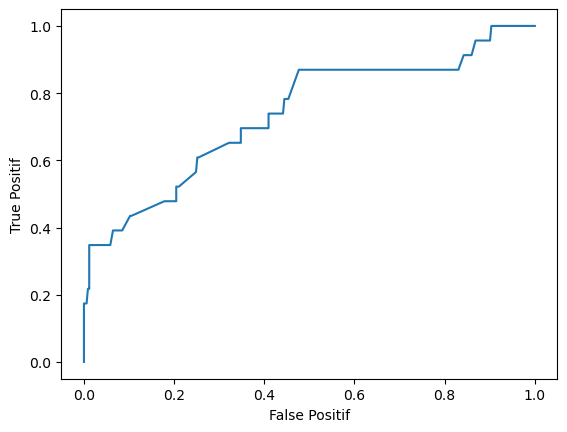

In [120]:
logreg_predict_treshold = logreg_predict_proba[:,1]

fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  logreg_predict_treshold)

plt.plot(fpr_logreg,tpr_logreg)
plt.ylabel('True Positif')
plt.xlabel('False Positif')
plt.show()

Comme avec le RF, j'essaye d'ajuster le treshold. Le score F1 s'améloire ici, la modification est concluante.

In [126]:
logreg_predict_treshold = [1 if prob > 0.8 else 0 for prob in logreg_predict_treshold]
print("LOGREG tresh matrice de confusion")
print(confusion_matrix(y_test, logreg_predict_treshold))
print(classification_report(y_test, logreg_predict_treshold))
print('\n')

LOGREG tresh matrice de confusion
[[128 214]
 [  3  20]]
              precision    recall  f1-score   support

           0       0.98      0.37      0.54       342
           1       0.09      0.87      0.16        23

    accuracy                           0.41       365
   macro avg       0.53      0.62      0.35       365
weighted avg       0.92      0.41      0.52       365





Le random forest et la regression logistique se comportent de façon opposée. Le RF va être plutôt bon pour prédire les échecs tandis que la REGLOG va prédire que tous les leads vont être convertis, le recall va donc être très bon sur les succès mais la précision moindre. Ce n'est pas ce que je cherche.
Essayons de mélanger les deux modèles via ensemble learning afin d'obtenir un meilleur score F1.

In [122]:
#ensemble
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('logreg', logreg)], voting='soft')
ensemble.fit(X_train, y_train)
ensemble_predict = ensemble.predict(X_test)
ensemble_predict_proba = ensemble.predict_proba(X_test)
print("ensemble matrice de confusion")
print(confusion_matrix(y_test, ensemble_predict))
print(classification_report(y_test, ensemble_predict))
print('\n')

ensemble matrice de confusion
[[338   4]
 [ 12  11]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       342
           1       0.73      0.48      0.58        23

    accuracy                           0.96       365
   macro avg       0.85      0.73      0.78       365
weighted avg       0.95      0.96      0.95       365





# Conclusion

L'ensemble learning est très bon en précision et en rappel pour les échecs (pas important). Il se comporte également mieux que le RF et la REGLOG sur les succès. C'est le modèle que je selectionnerai pour mes prédictions.

Le score F1 de 58% sur les conversions est selon moi satisfaisant. Pour améliorer ce score je vois plusieurs axes : 
- Avoir plus de données, 
- Essayer de redimensioner le dataset en équilibrant les succès et les échecs (méthode SMOTE),
- Avoir une meilleure selection des features (PCA, RFE),

On peut aussi faire le choix de prendre un modèle qui a un rappel plus élevé sur les succès. Dans mon étude il s'agit de la régression logistique. Cependant il n'est peut-être pas judicieux de prédire 220 personnes en succès. Même si parmi elles, on topera tous les rééls succès 90% des autres personnes auront été attribués à une mauvaise classe. C'est à l'utilisateur de faire le choix le plus pertinant selon chaque cas.

Il reste un point que je n'ai pas réalisé mais qui est imporant : Durant mon étude j'ai réalisé une validation croisée classique en séparant en deux mon dataset en 70/30. J'aurais pu le séparer en 3, d'abord en 90/10 puis en 70/30 sur le 90. Afin de tester mon modèle final sur les 10% initiaux. Je ne l'ai pas fait car le dataset étant limité à 1200 lignes, j'estimais que je n'aurais pas assez de données.